In [132]:
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import seaborn as sns 
import numpy as np
import squarify

In [133]:
# Load and read all dataset
data_path = "./datasets"

files = []
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

customers_dataset = pd.read_csv(f'{data_path}/olist_customers_dataset.csv')
geolocation_dataset = pd.read_csv(f'{data_path}/olist_geolocation_dataset.csv')
order_items_dataset = pd.read_csv(f'{data_path}/olist_order_items_dataset.csv')
order_payments_dataset = pd.read_csv(f'{data_path}/olist_order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv(f'{data_path}/olist_order_reviews_dataset.csv')
orders_dataset = pd.read_csv(f'{data_path}/olist_orders_dataset.csv')
products_dataset = pd.read_csv(f'{data_path}/olist_products_dataset.csv')
sellers_dataset = pd.read_csv(f'{data_path}/olist_sellers_dataset.csv')

In [134]:
# Check data sanity (entries and columns)
print("Customers Dataset: ", customers_dataset.shape)
print("Geolocation Dataset: ", geolocation_dataset.shape)
print("Order Items Dataset: ", order_items_dataset.shape)
print("Order Payments Dataset: ", order_payments_dataset.shape)
print("Order Reviews Dataset: ", order_reviews_dataset.shape)
print("Orders Dataset: ", orders_dataset.shape)
print("Products Dataset: ", products_dataset.shape)
print("Sellers Dataset: ", sellers_dataset.shape)

Customers Dataset:  (99441, 5)
Geolocation Dataset:  (1000163, 5)
Order Items Dataset:  (112650, 7)
Order Payments Dataset:  (103886, 5)
Order Reviews Dataset:  (99224, 7)
Orders Dataset:  (99441, 8)
Products Dataset:  (32951, 9)
Sellers Dataset:  (3095, 4)


Karena segmentasi yang akan dilakukan yaitu customer segmentation, maka preprocessing akan difokuskan pada data yang berkaitan dengan customer terlebih dahulu

In [135]:
def check_info(title, data):
    print(title)
    display(data.head())
    print(data.info())
    display(data.describe(include='all'))
    print(f"Missing values count: {data.isnull().sum().sum()}\n")

check_info("Customer dataset:", customers_dataset)
check_info("Order items dataset:", order_items_dataset)
check_info("Order payments dataset:", order_payments_dataset)
check_info("Orders dataset:", orders_dataset)

Customer dataset:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Missing values count: 0

Order items dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Missing values count: 0

Order payments dataset:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Missing values count: 0

Orders dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Missing values count: 4908



Ditemukan adanya missing values pada dataset orders

In [136]:
# check null values
print("Column name | Count of missing values | Total row | Percentage")
null = orders_dataset.isnull().sum()[orders_dataset.isnull().sum() > 0]
print(np.array(
    [null.index, null.values, [orders_dataset.shape[0]] * len(null), null.values / orders_dataset.shape[0] * 100]).T)
# check the data
display(orders_dataset[orders_dataset.isnull().any(axis=1)].head())
# check order status of missing values
print(orders_dataset[orders_dataset.isnull().any(axis=1)]['order_status'].value_counts())

Column name | Count of missing values | Total row | Percentage
[['order_approved_at' 160 99441 0.1608994278014099]
 ['order_delivered_carrier_date' 1783 99441 1.7930229985619612]
 ['order_delivered_customer_date' 2965 99441 2.981667521444877]]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: count, dtype: int64


In [137]:
print("total entry before delete: ", orders_dataset.shape[0])
orders_dataset = orders_dataset.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])
print("total row after delete: ", orders_dataset.shape[0])
orders_dataset.info()
orders_dataset.isnull().sum()

total entry before delete:  99441
total row after delete:  96461
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Lanjut preprocessing, fix data types dan standardize categorical variables

In [138]:
# convert datetime string on orders_dataset dataset to datetime type
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['order_approved_at'] = pd.to_datetime(orders_dataset['order_approved_at'])
orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(orders_dataset['order_delivered_carrier_date'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])
display(orders_dataset.head())
orders_dataset.info()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [139]:
# convert datetime string on order_item dataset to datetime type
order_items_dataset['shipping_limit_date'] = pd.to_datetime(order_items_dataset['shipping_limit_date'])
print(order_items_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


In [140]:
# convert order_status on order dataset to category type
orders_dataset['order_status'] = orders_dataset['order_status'].astype('category')
orders_dataset['order_status'].value_counts()

order_status
delivered    96455
canceled         6
Name: count, dtype: int64

In [141]:
# standardize order status using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
orders_dataset['order_status_encoded'] = le.fit_transform(orders_dataset['order_status'])

status_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Order status mapping: {status_mapping}")

Order status mapping: {'canceled': np.int64(0), 'delivered': np.int64(1)}


In [142]:
# standardize payment type using one hot encoding
payment_dummies = pd.get_dummies(order_payments_dataset['payment_type'], prefix='payment')
payments = pd.concat([order_payments_dataset, payment_dummies], axis=1)
# payments.drop(columns='payment_type', inplace=True)
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,False,True,False,False,False
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,False,True,False,False,False
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,False,True,False,False,False
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,False,True,False,False,False
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,False,True,False,False,False


---

null on customer city:  0.0
accent on customer city:  0


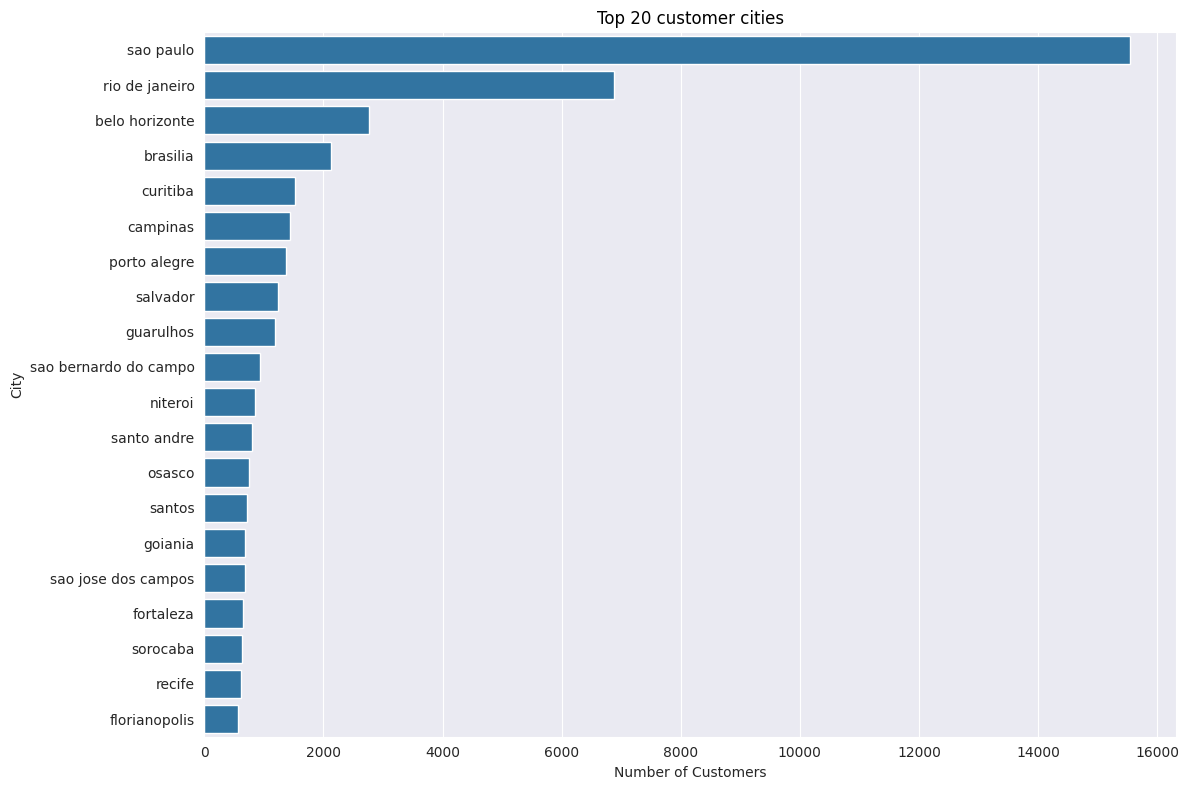

In [143]:
# top 20 customer cities
import unidecode
import re
print("null on customer city: ", customers_dataset['customer_city'].isna().mean())

# karena kota di brazil kemungkinan ada huruf dengan aksen dan ada kemungkinan duplikat dengan non-aksen, periksa terlebih dahulu 
def has_accented_characters(s):
    return bool(re.search(r'[^\x00-\x7F]', s))

print("accent on customer city: ", customers_dataset['customer_city'].apply(has_accented_characters).sum())

customer_city_counts = customers_dataset['customer_city'].value_counts().reset_index()
customer_city_counts.columns = ['City', 'Count']

top_20_cities = customer_city_counts.head(20)
# Plot using bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='City', data=top_20_cities)
plt.title('Top 20 customer cities')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [144]:
# heatmap customer
print("null in geolocation dataset: \n", geolocation_dataset.isna().mean())
print("unique val in geoloc: ", geolocation_dataset['geolocation_city'].unique())
def has_accented_characters(s):
    return bool(re.search(r'[^\x00-\x7F]', s))

print("accent on geolocation city: ", geolocation_dataset['geolocation_city'].apply(has_accented_characters).sum())
# karena ada kota dengan huruf aksen dan non-aksen duplikat, perlu dilakukan preprocessing terlebih dahulu
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())
geolocation_dataset['geolocation_city'] = geolocation_dataset['geolocation_city'].apply(pretty_string)
print("unique val in geoloc: ", geolocation_dataset['geolocation_city'].unique())
print("accent on geolocation city: ", geolocation_dataset['geolocation_city'].apply(has_accented_characters).sum())

null in geolocation dataset: 
 geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64
unique val in geoloc:  ['sao paulo' 'são paulo' 'sao bernardo do campo' ... 'ciríaco' 'estação'
 'vila lângaro']
accent on geolocation city:  73442
unique val in geoloc:  ['sao paulo' 'sao bernardo do campo' 'jundiai' ... 'floriano peixoto'
 'erebango' 'santa cecilia do sul']
accent on geolocation city:  0


geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
1200        1
1189        1
1290        1
1262        1
39523       1
Length: 19015, dtype: int64
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
470805                        24220       -22.905817       -43.106989   
470811                        24220       -22.902306       -43.112545   
470812                        24220       -22.904567       -43.110491   
470820                        24220       -22.902575       -43.109192   
470821                        24220       -22.907500       -43.106170   

       geolocation_city geolocation_state  
470805          niteroi                RJ  
470811          niteroi                RJ  
470812          niteroi                RJ  
470820          niteroi                RJ  
470821          niteroi                RJ  
(8, 2)


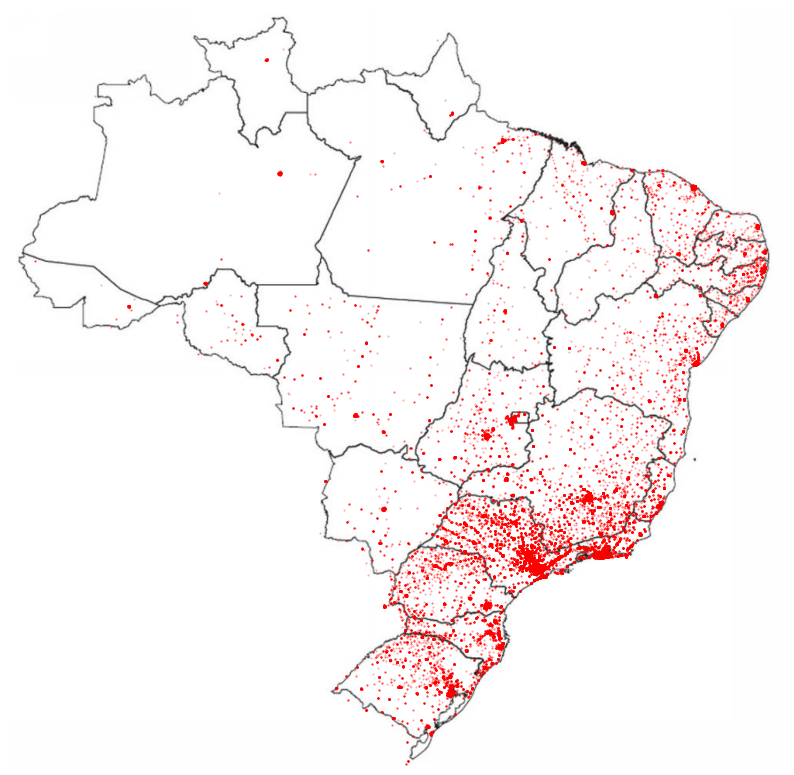

In [145]:
# heatmap customer lanjut part 2
import urllib
from matplotlib import image as mpimg
# cek zipcode
print(geolocation_dataset.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False))
# karena zipcode pada data di-hide sehingga hanya prefix nya saja yang dimunculkan, ada kemungkinan satu zipcode prefix memiliki beberapa koordinat, sesuai dengan zipcode lengkapnya
print(geolocation_dataset[geolocation_dataset['geolocation_zip_code_prefix'] == 24220].head())
# oleh karena itu perlu dilakukan data processing dengan mengambil titik tengah dari masing2 zipcode prefix
state_unique_geolocation = geolocation_dataset.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
print(state_unique_geolocation[state_unique_geolocation['count']>= 2].shape)
max_state = geolocation_dataset.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)
geolocation_coords = geolocation_dataset.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_coords = geolocation_coords.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')
customers_coords = customers_dataset.merge(geolocation_coords,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')
# mari mapping 
brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
ax = customers_coords.drop_duplicates(subset='customer_unique_id').plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='red')
plt.axis('off')
plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
plt.show()

In [146]:
# alternatif heatmap yang sinan pengen
import folium
from folium.plugins import HeatMap

customer_counts = customers_coords.groupby(['geolocation_lat', 'geolocation_lng']).size().reset_index(name='customer_count')

# Create a map centered on Brazil
brazil_map = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)

# Add heatmap layer
heat_data = [[row['geolocation_lat'], row['geolocation_lng'], row['customer_count']]
             for index, row in customer_counts.iterrows()]
HeatMap(heat_data).add_to(brazil_map)
display(brazil_map)

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15

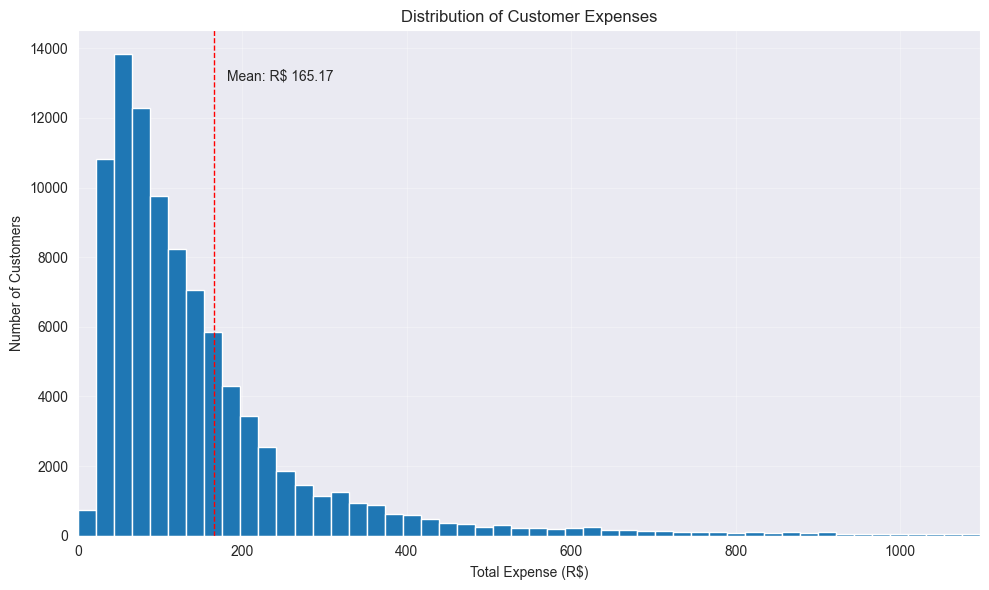

In [147]:
# average expense of a customer
orders_with_customers = pd.merge(orders_dataset, customers_dataset, on='customer_id')
orders_with_items = pd.merge(orders_with_customers, order_items_dataset, on='order_id')
print(orders_with_items.head())

# total expense per customer (unique_id)
orders_with_items['total_value'] = orders_with_items['price'] + orders_with_items['freight_value']
customer_expenses = orders_with_items.groupby('customer_unique_id')['total_value'].sum().reset_index()
customer_expenses.columns = ['Customer ID', 'Total Expense']
print(customer_expenses.head())

# average customer expense
avg_expense = customer_expenses['Total Expense'].mean()
print(f"Average customer expense: R$ {avg_expense:.2f}")

# some additional statistics
perc_99 = np.percentile(customer_expenses['Total Expense'], 99)
print(f"Median customer expense: R$ {customer_expenses['Total Expense'].median():.2f}")
print(f"Maximum customer expense: R$ {customer_expenses['Total Expense'].max():.2f}")
print(f"99th percentile expense: R$ {perc_99:.2f}")

# histogram
# karena adanya outlier yang membuat histogram sebelumnya terlihat terlalu lebar, maka range histogram akan di set ke max 99th percentile saja
plt.figure(figsize=(10, 6))
plt.hist(customer_expenses['Total Expense'], bins=50, range=(0, perc_99))
plt.axvline(avg_expense, color='red', linestyle='dashed', linewidth=1)
plt.text(avg_expense*1.1, plt.ylim()[1]*0.9, f'Mean: R$ {avg_expense:.2f}')
plt.title('Distribution of Customer Expenses')
plt.xlabel('Total Expense (R$)')
plt.ylabel('Number of Customers')
plt.xlim(0, perc_99)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Order count per year
   year  order_count
0  2016          272
1  2017        43411
2  2018        52778
Average monthly orders: 4193.96
Average yearly orders: 32153.67


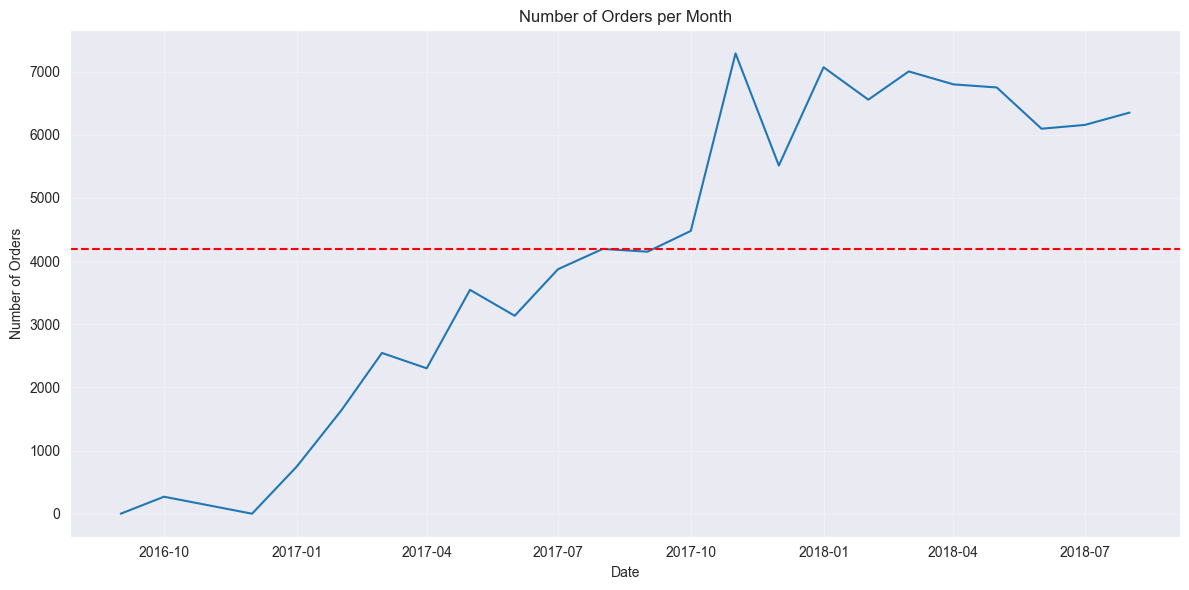

In [148]:
# average order in a year
orders_dataset['year'] = orders_dataset['order_purchase_timestamp'].dt.year
orders_dataset['month'] = orders_dataset['order_purchase_timestamp'].dt.month

monthly_orders = orders_dataset.groupby(['year', 'month']).size().reset_index(name='order_count')
monthly_orders['date'] = pd.to_datetime(monthly_orders['year'].astype(str) + '-' + monthly_orders['month'].astype(str) + '-01')
monthly_orders = monthly_orders.sort_values('date')

yearly_orders = orders_dataset.groupby(['year']).size().reset_index(name='order_count')
print("Order count per year")
print(yearly_orders)

avg_monthly_orders = monthly_orders['order_count'].mean()
print(f"Average monthly orders: {avg_monthly_orders:.2f}")
avg_yearly_orders = yearly_orders['order_count'].mean()
print(f"Average yearly orders: {avg_yearly_orders:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(monthly_orders['date'], monthly_orders['order_count'])
plt.axhline(avg_monthly_orders, color='red', linestyle='dashed')
plt.title('Number of Orders per Month')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


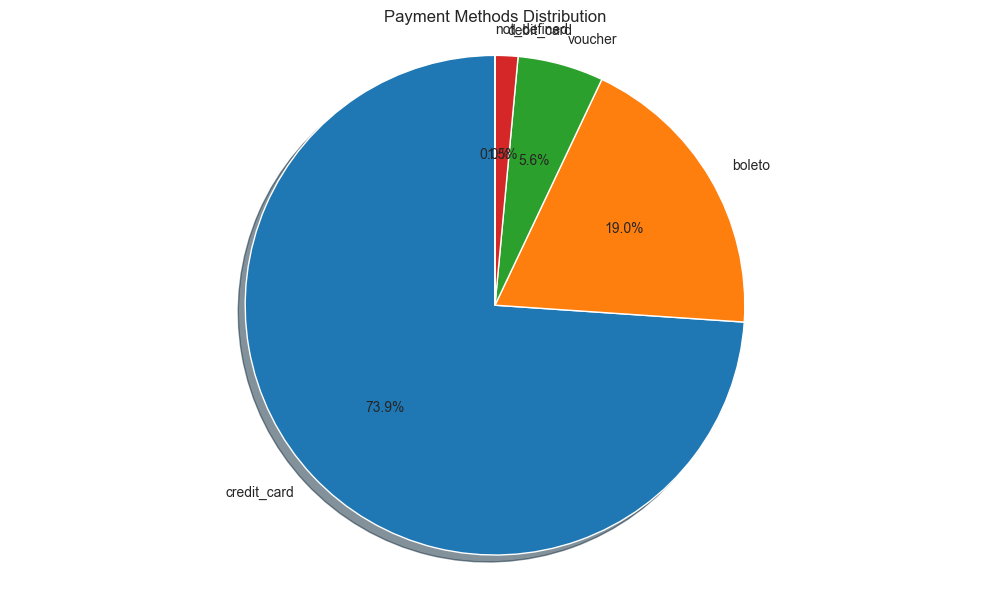

  Payment Method  Percentage
0    credit_card   73.922376
1         boleto   19.043952
2        voucher    5.558978
3     debit_card    1.471806
4    not_defined    0.002888


In [149]:
payment_counts = order_payments_dataset['payment_type'].value_counts()
print(payment_counts)

payment_percentages = (payment_counts / payment_counts.sum() * 100).reset_index()
payment_percentages.columns = ['Payment Method', 'Percentage']

plt.figure(figsize=(10, 6))
plt.pie(payment_percentages['Percentage'], labels=payment_percentages['Payment Method'],
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('Payment Methods Distribution')
plt.tight_layout()
plt.show()

print(payment_percentages)

---

# Merge Customer, Order, and Payment Data Frane

In [150]:
#Merging all relevant datasets
merged_ds = pd.merge(customers_dataset, orders_dataset, on='customer_id', how='inner')
merged_ds = pd.merge(merged_ds, order_items_dataset, on='order_id', how='inner')
merged_ds = pd.merge(merged_ds, order_payments_dataset, on='order_id', how='inner')

In [151]:
# Shape 
print(merged_ds.shape)

(115018, 25)


In [152]:
# Info
print(merged_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115018 entries, 0 to 115017
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115018 non-null  object        
 1   customer_unique_id             115018 non-null  object        
 2   customer_zip_code_prefix       115018 non-null  int64         
 3   customer_city                  115018 non-null  object        
 4   customer_state                 115018 non-null  object        
 5   order_id                       115018 non-null  object        
 6   order_status                   115018 non-null  category      
 7   order_purchase_timestamp       115018 non-null  datetime64[ns]
 8   order_approved_at              115018 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115018 non-null  datetime64[ns]
 10  order_delivered_customer_date  115018 non-null  datetime64[ns]
 11  

# Cleaning Data

In [153]:
# Convert datetime columns to datetime type
merged_ds['order_purchase_timestamp'] = pd.to_datetime(merged_ds['order_purchase_timestamp'])

In [154]:
# filter out rows that are not delivered (incomplete)
merged_ds = merged_ds[merged_ds['order_status'] == 'delivered'].copy()

In [155]:
# Count missing values
print("Missing values count:\n", merged_ds.isnull().sum())

Missing values count:
 customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_status_encoded             0
year                             0
month                            0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64


In [156]:
# Drop missing values
merged_ds = merged_ds.dropna()

In [157]:
# Count duplicate values
print("Duplicate values count: ", merged_ds.duplicated().sum())

Duplicate values count:  0


# RFM

In [159]:
max_date = merged_ds['order_purchase_timestamp'].max()  

RFM = merged_ds.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'order_id': 'count',
    'payment_value': 'sum'
})

RFM.columns = ['recency', 'frequency', 'monetary']

In [160]:
RFM.isna().sum()

recency      0
frequency    0
monetary     0
dtype: int64

In [162]:
RFM.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
recency,93335.0,236.898752,152.545822,0.00,8.00,22.00,41.00,113.00,218.00,345.00,464.600,519.000,574.0000,694.00
frequency,93335.0,1.232239,0.819845,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.000,2.000,4.0000,75.00
monetary,93335.0,211.844495,642.239857,9.59,22.75,32.69,40.17,63.75,112.95,201.74,402.136,658.947,1672.4694,109312.64


# Recency

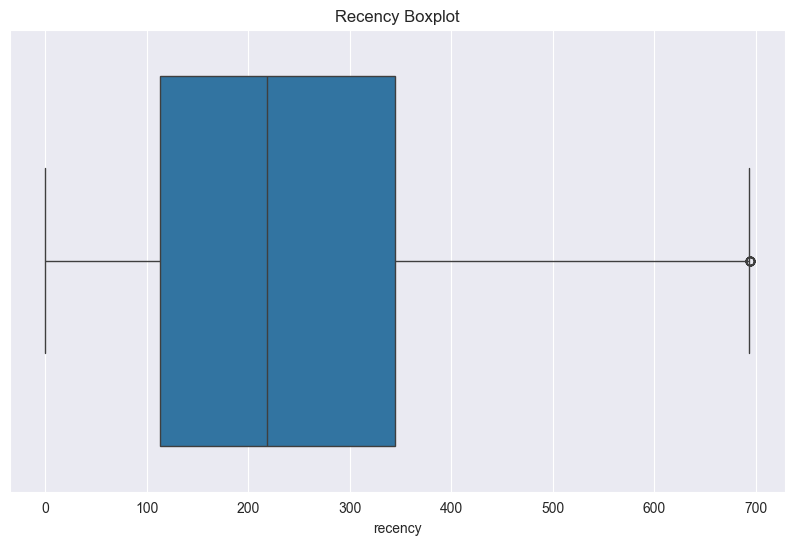

In [163]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='recency', data=RFM)
plt.title('Recency Boxplot')
plt.show()

# Frequency

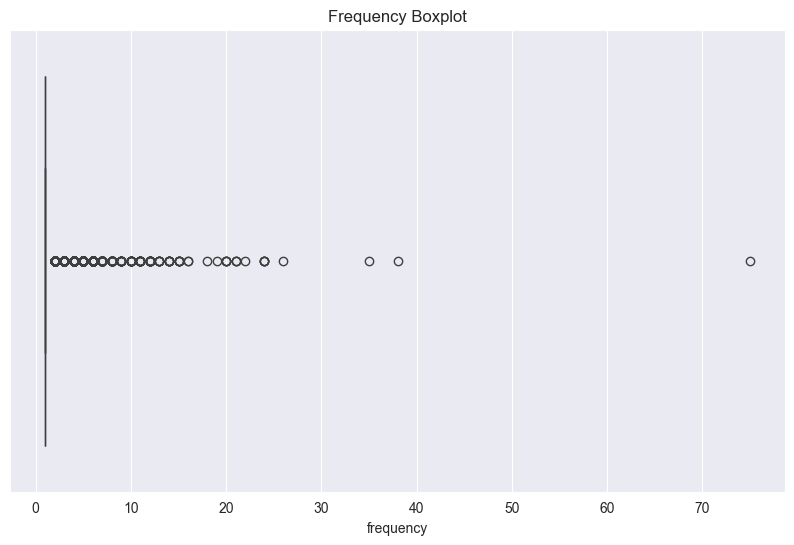

In [164]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='frequency', data=RFM)
plt.title('Frequency Boxplot')
plt.show()

In [165]:
# count each freq value desc by frequency
print(RFM['frequency'].value_counts().sort_index(ascending=False))

frequency
75        1
38        1
35        1
26        1
24        4
22        1
21        3
20        4
19        1
18        1
16        2
15        6
14        7
13        6
12       23
11       19
10       19
9        19
8        40
7        72
6       271
5       300
4       893
3      1910
2     10413
1     79317
Name: count, dtype: int64


# Monetary

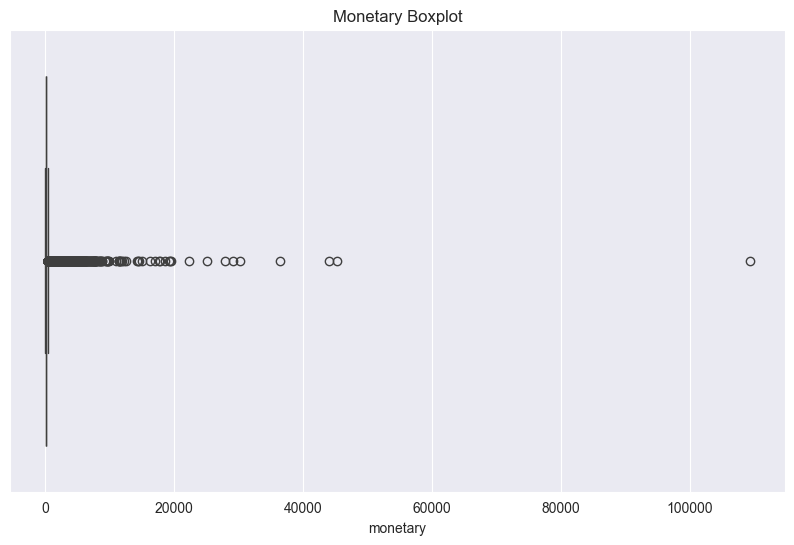

In [166]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='monetary', data=RFM)
plt.title('Monetary Boxplot')
plt.show()

# Calculate RFM Score

In [167]:
RFM['R_Score'] = pd.qcut(RFM['recency'], 3, labels=[1, 2 ,3]).astype(str)
RFM['M_Score'] = pd.qcut(RFM['monetary'], 3, labels=[1, 2 ,3]).astype(str)
RFM['F_Score'] = RFM['frequency'].apply(lambda x: '1' if x == 1 else ('2' if x == 2 else '3'))

RFM['RFM_Score'] = RFM['R_Score'] + RFM['F_Score'] + RFM['M_Score']

In [168]:
def segment(x):
    if x == '222':  # Middle value across all dimensions
        return 'Core'
    elif x in ['311', '312', '313']:  # High recency (oldest), low/mid frequency
        return 'Gone'
    elif x in ['111', '112', '113']:  # Low across board or low R&F with any monetary
        return 'Rookies'
    elif x in ['233', '333', '323']:  # High monetary with mid/high frequency and recency
        return 'Whales'
    elif x in ['221', '222', '231', '232', '322', '321']: 
        return 'Loyal'
    else:
        return 'Regular'

In [169]:
RFM['segments'] = RFM['RFM_Score'].apply(segment)
RFM['segments'].value_counts(normalize=True) * 100

segments
Regular    36.176140
Rookies    28.578775
Gone       28.086998
Whales      4.673488
Loyal       1.743183
Core        0.741415
Name: proportion, dtype: float64

In [170]:
segment_wise = RFM.groupby('segments').agg(RecencyMean = ('recency', 'mean'),
                                          FrequencyMean = ('frequency', 'mean'),
                                          MonetaryMean = ('monetary', 'mean'),
                                          Count = ('segments', 'count')).sort_values(by='MonetaryMean', ascending=False)

segment_wise

,RecencyMean,FrequencyMean,MonetaryMean,Count
segments,,,,
Whales,367.417698,2.969509,859.849842,4362
Regular,201.534607,1.309285,226.387115,33765
Rookies,75.009222,1.000000,154.676163,26674
Gone,417.935457,1.000000,153.300089,26215
Core,218.164740,2.000000,122.647688,692
Loyal,366.016595,2.198525,91.219385,1627


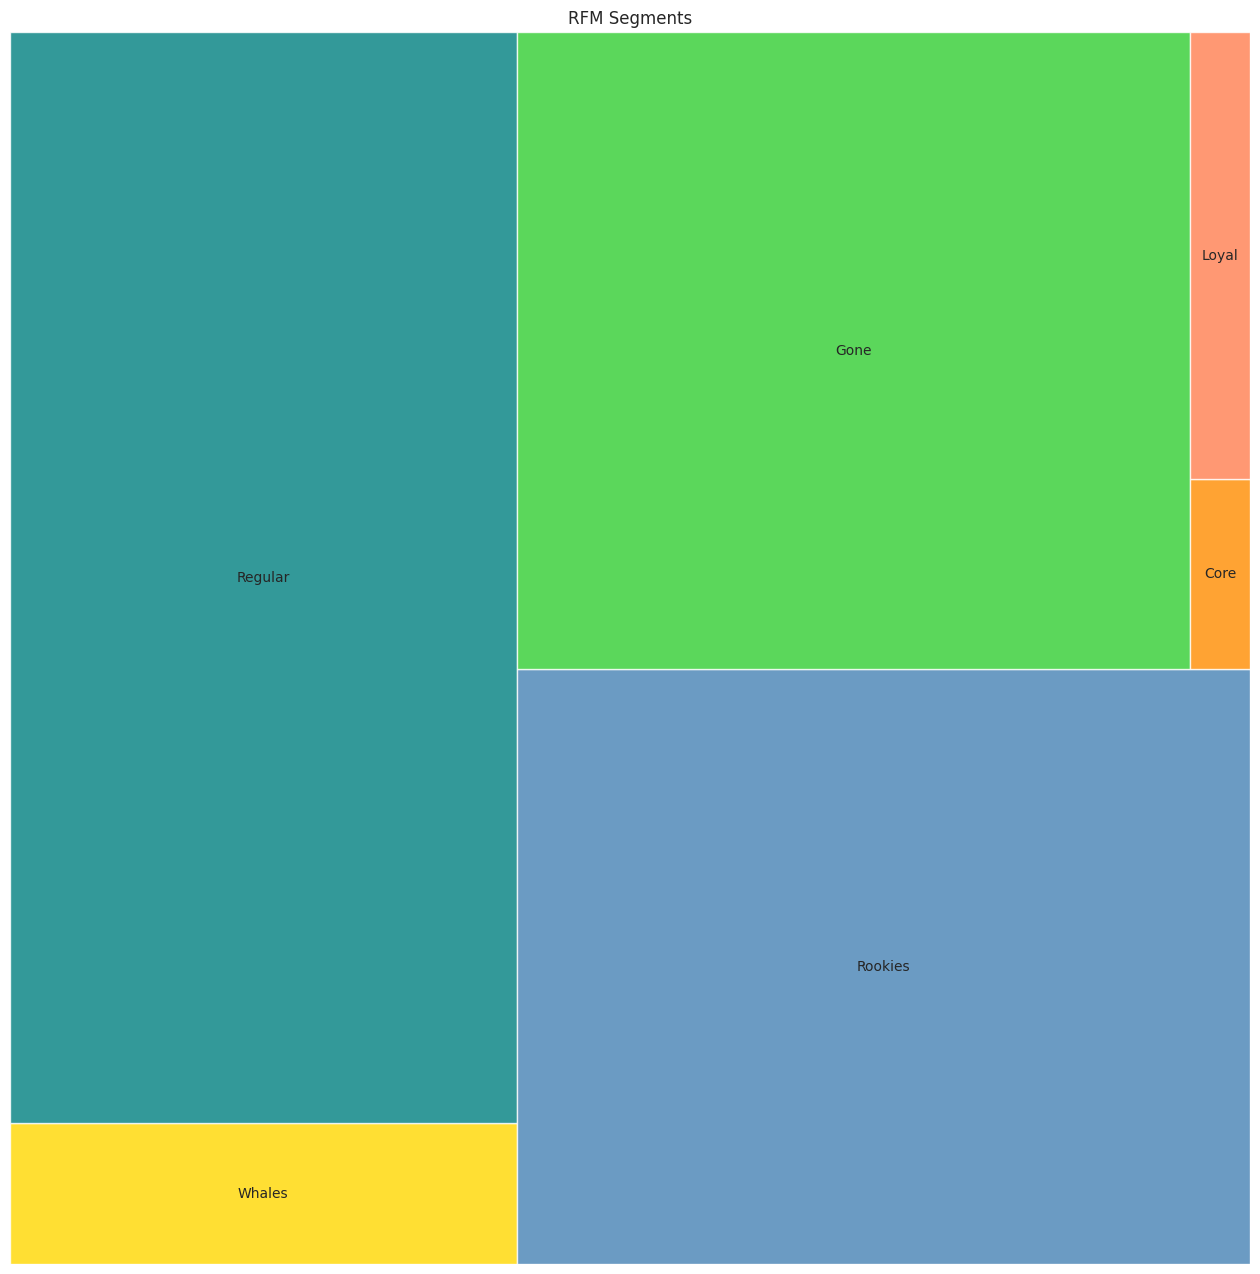

In [172]:
plt.rcParams['font.family'] = 'DejaVu Sans'

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
squarify.plot(sizes=segment_wise['Count'],
              label=segment_wise.index,
              color=['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              alpha=0.8)
plt.title("RFM Segments")
plt.axis('off')
plt.show()

In [173]:
# RFM Pivot Table
rfm_pivot = RFM.pivot_table(index='R_Score', columns='F_Score', values='monetary', aggfunc='mean').sort_index(ascending=False)

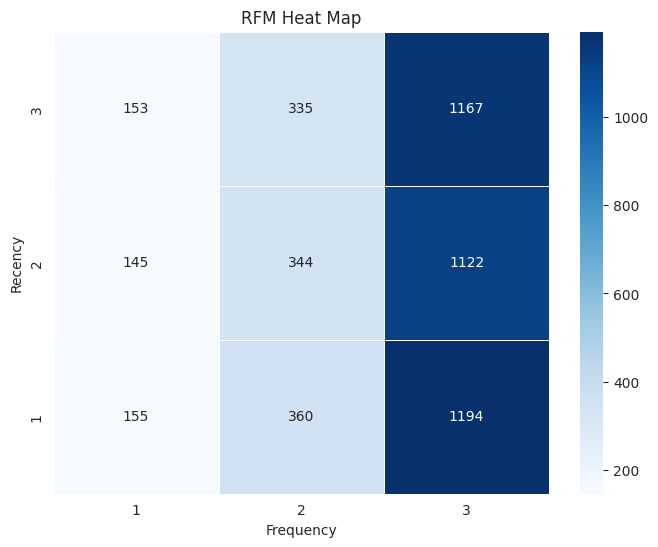

In [176]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_pivot, cmap="Blues", annot=True, fmt='.0f', linewidths=.5)
plt.title("RFM Heat Map")
plt.xlabel("Frequency")
plt.ylabel("Recency")
plt.show()

---